<a href="https://colab.research.google.com/github/suchirasuresh/Applied-Data-Science-in-Medicine-Psychology-ads_assignment_1--suchira_suresh-/blob/main/06_numpy_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [42]:
github_username = "suchirasuresh"
idm_credentials = "22770770"

---

# **Applied Data Science in Medicine & Psychology - Assignment 6**
## Numpy and Scipy
---
**Deadline: 13.06.2023, 23:59**
### **General setup and submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you take a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/06_numpy_scipy-<username>`` from the Repository drop-down menu
    * Type ``06_numpy_scipy.ipynb`` into the File path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update the copy of your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, we take a first glance at the ``NumPy`` and ``SciPy`` packages, two important packages with a huge range of functionalities. While ``NumPy`` focuses on efficient array manipulation and mathematical operations, ``SciPy`` builds upon NumPy to provide a broader range of scientific and numerical computing tools and algorithms.

#### **Assignment goals**
You are going to learn the following things in this assignment:
1. how to handle arrays
2. how to access data in arrays based on conditions
3. how to use mathematical functions on arrays
4. how to apply functions to your data

#### **Assignment point value**
This assignment is worth a total (up to) **10** points. If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks**
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# install the BioPsyKit package
!pip install biopsykit
import biopsykit as bp
from scipy import signal
from scipy.datasets import electrocardiogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 1. Perceived Stress Scale
In this task, we compute the Perceived Stress Scale (PSS) for a real-world dataset with 38 participants:
* The PSS is a widely used self-report questionnaire with adequate reliability and validity, asking about how stressful a person has found his/her life during the previous month.
* The participant is asked to rate questions like "In the last month, how often have you been upset because of something that happened unexpectedly?" from 0 (never) to 4 (very often).
* Six of the questions are formulated negatively (like the previous one) and summarized in the subscale *Perceived Helplessness*: The other four belong to the subscale *Perceived Self-Efficacy* and are formulated positively.
* Therefore, the scores from *Perceived Self-Efficacy* have to be inverted to compute the Total Score from both subscales.
* The Total Score can range between 0 and 40, with higher scores indicating higher perceived stress.
* For this task, we use a dataset which is provided by the package BioPsyKit (Richer et al., (2021). BioPsyKit: A Python package for the analysis of biopsychological data. Journal of Open Source Software, 6(66), 3702, https://doi.org/10.21105/joss.03702).

In [44]:
# run the cell to load the data
data = bp.example_data.get_questionnaire_example()
data, _ = bp.questionnaires.utils.find_cols(data, starts_with="PSS")
data.head()

,PSS_01,PSS_02,PSS_03,PSS_04,PSS_05,PSS_06,PSS_07,PSS_08,PSS_09,PSS_10
subject,,,,,,,,,,
Vp01,3,2,3,3,2,2,2,2,3,1
Vp02,1,1,1,3,2,1,3,3,1,0
Vp03,2,3,3,2,2,2,1,1,3,1
Vp04,2,2,2,3,2,2,3,2,2,1
Vp05,0,2,2,3,2,1,3,3,2,1


In [45]:
# run cell to convert data from pandas dataframe to numpy array
data_pss = data.to_numpy()
data_pss[:5, :] # just for visualization

array([[3, 2, 3, 3, 2, 2, 2, 2, 3, 1],
       [1, 1, 1, 3, 2, 1, 3, 3, 1, 0],
       [2, 3, 3, 2, 2, 2, 1, 1, 3, 1],
       [2, 2, 2, 3, 2, 2, 3, 2, 2, 1],
       [0, 2, 2, 3, 2, 1, 3, 3, 2, 1]])

##### 1.1 Create the function ``check_score_range`` that takes the parameters ``data`` and ``score_range`` and checks whether all of the data are within the given range:
* ``data``: numpy array containing the ten individual PSS scores of all participants
* ``score_range``: list in the format [min_value, max_value] (inclusive endpoints)
* The function should return ``True`` if all values are within the range, otherwise ``False``

In [46]:
def check_score_range(data, score_range):
    min_value, max_value = score_range
    return np.all((data >= min_value) & (data <= max_value))


In [47]:
# run tests to check your implementation
np.random.seed(0)
data_test = np.random.randint(low=0, high=5, size=[5, 10])
assert check_score_range(data_test, [0, 4]), "Ensure that you handled your endpoints correctly"
assert check_score_range(data_test, [0, 3]) == False, "Ensure that you handled your endpoints correctly"

##### 1.2 Create the function ``invert`` that takes the parameters ``data`` and ``score_range`` and inverts the scores:
* ``data``: numpy array containing PSS score columns of all participants that need to be inverted
* ``score_range``: list in the format [min_value, max_value] (inclusive endpoints)
* The function should return an array with the inverted scores from ``data`` in the given range ``score_range``

Example: If the input is ``[1, 3, 4, 2]`` and ``score_range`` is ``[0, 4]``, the function should return ``[3, 1, 0, 2]``.

In [48]:
def invert(data, score_range):
    min_value, max_value = score_range
    return (max_value - data) + min_value


In [49]:
# run test to check your implementation
data_test = np.array([[1, 3, 4, 1], [2, 4, 1, 1]])
assert np.array_equal(invert(data_test, [0, 5]), np.array([[4, 2, 1, 4], [3, 1, 4, 4]])), "Check your inversion process"

##### 1.3 Create the function ``calc_score`` that takes the parameter ``data`` and calculates the row-wise sum (the score of one participant is the sum over the individual questions scores):
* ``data``: numpy array containing PSS scores of all participants that need to be summarized
* The function should return a column vector with the row-wise summed-up scores

Example: If the input is ``[[1, 3, 4, 2], [2, 2, 4, 1]]``, the function should return ``[[10], [9]]``.

In [50]:
def calc_score(data):
    return np.sum(data, axis=1, keepdims=True)


In [51]:
# run test to check your implementation
assert np.shape(calc_score(np.array([[1, 3], [2, 4]])))[0] == 2, "Check if you return a row or column vector"
assert np.array_equal(calc_score(np.array([[1, 3], [2, 4]])), np.array([[4], [6]])), "Check if you perform the summation row-wise"

##### 1.4 Create a function called ``calc_pss`` that takes ``data``, ``score_range``, and ``subscales`` as parameters and calculates the scores for *Perceived Helplessness*, *Perceived Self-Efficacy*, and the Total Score for all the participants.
* ``data``: numpy array containing the ten individual PSS scores of all participants
* ``score_range``: list in the format [min_value, max_value] (inclusive endpoints, given in cell below)
* ``subscales``: dictionary containing the lists of column indices belonging to *Helplessness* and *Self-Efficacy* (given in cell below)
* Check if all the values of ``data`` are within ``score_range`` using ``check_score_range``. If yes. continue, otherwise return ``None``
* Calculate the scores for *Perceived Helplessness* and *Perceived Self-Efficacy* separately using ``calc_score`` (Do not forget to ``invert`` the *Self-Efficacy* scores first)
* Calculate the Total Score from both scores using ``calc_score``.
* The function should return an array with three columns (0: *Perceived Helplessness* score, 1: *Perceived Self-Efficacy* score, 2: Total Score)

**Hint**: Check out if [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) can help you with your implementation.

In [52]:
score_range = [0, 4]
subscales = {"Helpless": [0, 1, 2, 5, 8, 9], "SelfEff": [3, 4, 6, 7]}

def calc_pss(data, score_range, subscales):
    # Checking values are within score_range
    if not check_score_range(data, score_range):
        return None

    # column indices for Helplessness and Self-Efficacy
    helpless_indices = subscales['Helpless']
    selfeff_indices = subscales['SelfEff']

    # scores for Helplessness and Self-Efficacy
    Perceived_helplessness = calc_score(data[:, helpless_indices])
    Perceived_self_efficacy = calc_score(invert(data[:, selfeff_indices], score_range))

    # Total Score
    total_scores = calc_score(np.concatenate((Perceived_helplessness, Perceived_self_efficacy), axis=1))

    # Concatenatination using np.concatenate
    result = np.concatenate((Perceived_helplessness, Perceived_self_efficacy, total_scores), axis=1)

    return result


In [53]:
# run tests to check your implementation
np.random.seed(0)
data_test = np.random.randint(low=0, high=5, size=(2, 10))
assert np.shape(calc_pss(data_test, score_range, subscales))[1] == 3, "Ensure that you return all three calculated parameters"
assert calc_pss(data_test, [0, 3], None) == None, "Ensure that you handled the score range check correctly"
assert np.array_equal(calc_pss(data_test, score_range, subscales), np.array([[12, 5, 17], [12, 14, 26]])), "Check your parameter calculation"

##### 1.5 Create a function ``interprete_pss`` that takes ``total_score`` as parameter and identifies the level of stress:
* ``total_score``: numpy array containing the Total PSS Scores (row-vector)
* The function should return a row vector indicating the stress level (as integer: 1, 2, or 3) for every participant based on ``total_score``
    * stress level 1: Total Score 0 - 13 -> low stress
    * stress level 2: Total Score 14 - 26 -> moderate stress
    * stress level 3: Total Score 27 - 40 -> high stress

**Hint**: Check out if boolean masks can help you here.

In [54]:
def interprete_pss(total_score):
    low_stress_mask = (total_score >= 0) & (total_score <= 13)
    moderate_stress_mask = (total_score >= 14) & (total_score <= 26)
    high_stress_mask = (total_score >= 27) & (total_score <= 40)

    stress_level = np.zeros_like(total_score)
    stress_level[low_stress_mask] = 1
    stress_level[moderate_stress_mask] = 2
    stress_level[high_stress_mask] = 3

    return stress_level


In [55]:
# run test to check your implementation
assert np.array_equal(interprete_pss(np.array([0, 13, 14, 26, 27, 40])), np.array([1, 1, 2, 2, 3, 3])), "Ensure that you set the stress levels correctly"

##### 1.6 Run the cell below to visualize your results for this PSS dataset:

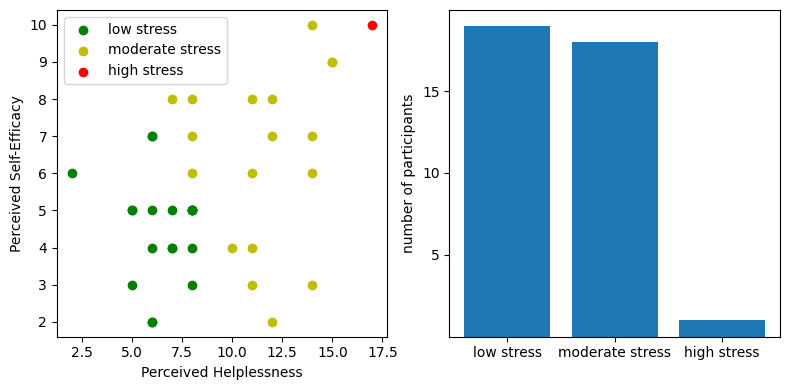

In [56]:
score_range = [0, 4]
subscales = {"Helpless": [0, 1, 2, 5, 8, 9], "SelfEff": [3, 4, 6, 7]}
scores = calc_pss(data_pss, score_range, subscales)
stress_levels = interprete_pss(scores[:, 2])
score_counts = np.bincount(stress_levels)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].scatter(scores[stress_levels==1, 0], scores[stress_levels==1, 1], label="low stress", color='g')
axs[0].scatter(scores[stress_levels==2, 0], scores[stress_levels==2, 1], label="moderate stress", color='y')
axs[0].scatter(scores[stress_levels==3, 0], scores[stress_levels==3, 1], label="high stress", color='r')
axs[0].legend()
axs[0].set_xlabel("Perceived Helplessness")
axs[0].set_ylabel("Perceived Self-Efficacy")
axs[1].bar([1, 2, 3], score_counts[1:])
axs[1].set_xticks([1, 2, 3])
axs[1].set_xticklabels(["low stress", "moderate stress", "high stress"])
axs[1].set_yticks([5, 10, 15])
axs[1].set_ylabel("number of participants")
fig.tight_layout()

#### 2. Electrocardiogram (ECG) Analysis
In this task, we will implement an ECG analysis that removes low and high-frequency artifacts, identifies ECG R peaks, and calculates the heart rate in beats per minute (bpm). We use functions provided by ``NumPy`` and ``SciPy`` (linked in the respective sub-task) and a part of the ECG signal provided by ``SciPy`` (``ecg``), which has a sampling frequency ``fs`` of 360 Hz.

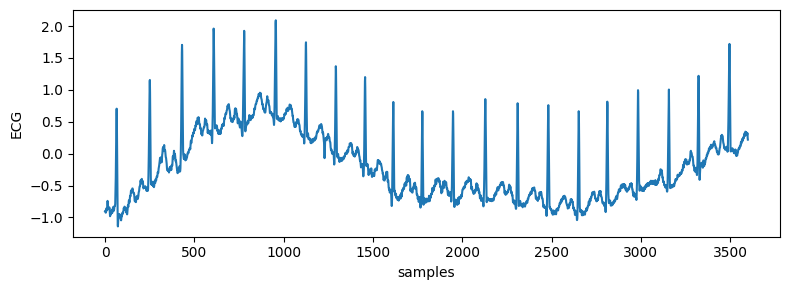

In [57]:
# run this cell to visualize the ECG
fs = 360
ecg = electrocardiogram()[2000:5600]

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(ecg)
ax.set_xlabel("samples")
ax.set_ylabel("ECG")
fig.tight_layout()

##### 2.1 Create a Butterworth filter ``sos`` to remove the baseline and high-frequency artifacts using the [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) implementation with the following parameters:
* Order of the filter: 2
* Critical frequencies:
    * baseline artifacts: 0.5 Hz
    * high-frequency artifacts: 50 Hz
* Filter type: bandpass
* Sampling Frequency: 360 Hz, ECG Sampling Frequency
* Output type: sos

Use [scipy.signal.sosfiltfilt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfiltfilt.html) for applying the filter to ``ecg`` and save the result in the variable ``ecg_filtered``:

**Hint**: Have a look how ``scipy.signal`` is imported.

In [58]:
def bw_sos(sampling_freq):
    # critical frequencies for the filter
    baseline_low = 0.5  # since 0.5Hz
    baseline_high = 50  # since 50Hz

    # normalized critical frequencies
    nyquist_freq = 0.5 * sampling_freq
    baseline_low_norm = baseline_low / nyquist_freq
    baseline_high_norm = baseline_high / nyquist_freq

    # filter order
    filter_order = 2

    # Butterworth filter SOS
    sos = signal.butter(filter_order, [baseline_low_norm, baseline_high_norm], btype='bandpass', output='sos')

    return sos

# sampling frequency= 360 Hz
sampling_freq = 360
sos = bw_sos(sampling_freq)

# filter is applied to the ECG signal using sosfiltfilt
ecg_filtered = signal.sosfiltfilt(sos, ecg)

In [59]:
# run tests to check your implementation
assert np.min(ecg_filtered) >= -1 and np.max(ecg_filtered) <= 1.8, "Check if you applied the filter to the ecg signal"

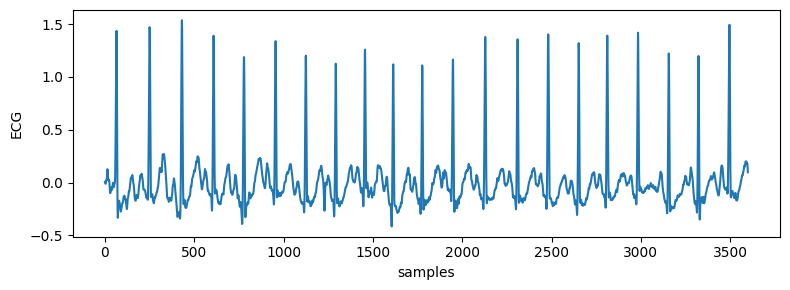

In [60]:
# run this cell to visualize the filtered ecg
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(ecg_filtered)
ax.set_xlabel("samples")
ax.set_ylabel("ECG")
fig.tight_layout()

##### 2.2 One parameter that is derived from ECGs in almost every analysis pipeline is the heart rate which is calculated based on the differences between the R peaks (highest ECG peaks):
* Use [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) to identify all the R peaks in ``ecg_filtered``.
* Play around with the parameters of the function such that only the R peaks and not all of the peaks in the signal are identified. Save your results as numpy array in the variable ``r_peaks``.

In [61]:
# parameters of the find_peaks function adjusted to detect peaks
peaks, _ = signal.find_peaks(ecg_filtered, prominence=0.5, distance=50)

# peaks saved as as a numpy array
r_peaks = np.array(peaks)


In [62]:
# run tests to check your implementation
assert type(r_peaks) == np.ndarray, "Check if r_peaks is of type tuple, if yes index the first element to get only the positions of the R peaks"
assert len(r_peaks) == 21, "Check if you find all the r peaks of the ecg"

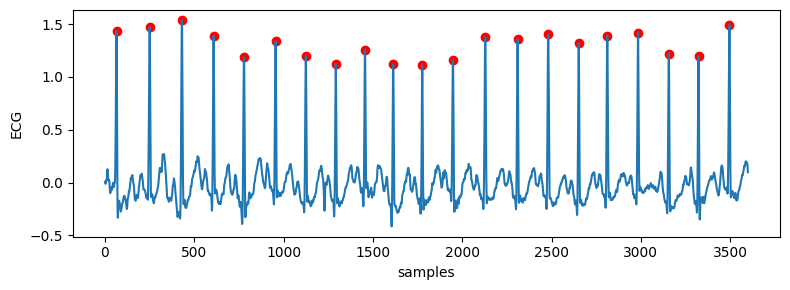

In [63]:
# run this cell to visualize the filtered ECG with all identified r_peaks
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(ecg_filtered)
ax.scatter(r_peaks, ecg_filtered[r_peaks], color='red')
ax.set_xlabel("samples")
ax.set_ylabel("ECG")
fig.tight_layout()

##### 2.3 To verify results, it is often helpful to visualize a signal over time in seconds and not samples. Use the [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate a vector called ``t`` that corresponds to the time vector of the ECG:

**Hint**: A sampling frequency of 360 Hz means that 360 samples are recorded in 1 second. Our signal is 10 seconds long and therefore consists of 3600 samples.

In [64]:
sampling_freq = 360  # 360Hz
signal_length = 10  # 10seconds
num_samples = sampling_freq * signal_length

t = np.linspace(0, signal_length, num_samples)


In [65]:
# run tests to check your implementation
assert len(t) == 3600, "Your time signal must have the length of the ecg signal"
assert np.min(t) == 0 and np.max(t) <= 10, "Ensure that you set the parameters of linspace correctly"

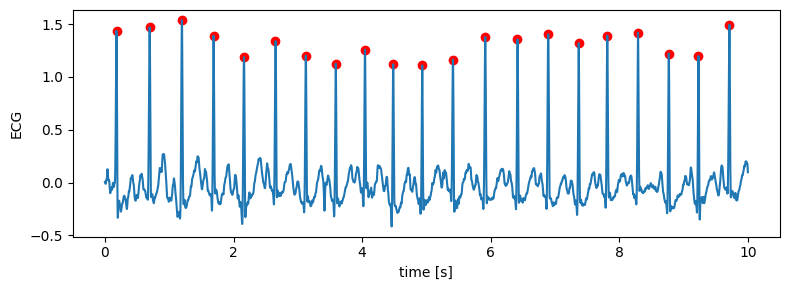

In [66]:
# run this cell to visualize the filtered ECG with all identified r_peaks over time
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, ecg_filtered)
ax.scatter(r_peaks/fs, ecg_filtered[r_peaks], color='red')
ax.set_xlabel("time [s]")
ax.set_ylabel("ECG")
fig.tight_layout()

##### 2.4 Create a function called ``calc_hr_bpm`` that calculates the heartrate of an ECG in bpm and takes the parameter ``r_peaks`` and ``fs``
* ``r_peaks``: numpy array with R peak positions in samples
* ``fs``: Sampling frequency of the ECG
* You can use [numpy.diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) and [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) in your implementation

**Hint**: 1 Hz corresponds to 60 bpm.

In [67]:
def calc_hr_bpm(r_peaks, fs):
    # time differences between consecutive R peaks
    r_time_diff = np.diff(r_peaks) / fs

    # heart rate in bpm
    heart_rate = 60 / np.mean(r_time_diff)

    return heart_rate


In [68]:
# run test to check your implementation
assert calc_hr_bpm(np.array([300, 600, 900]), 300) == 60, "Ensure that you performed all neccessary steps for the heart rate calculation, diff, mean, conversion to seconds, and conversion to minutes"

##### 2.5 Calculate the heart rate of the ECG in bpm using ``calc_hr_bpm`` and ``r_peaks`` and save it in the variable ``hr``. Can you verify this result with the plot of the ECG over time?

125.91081317400175


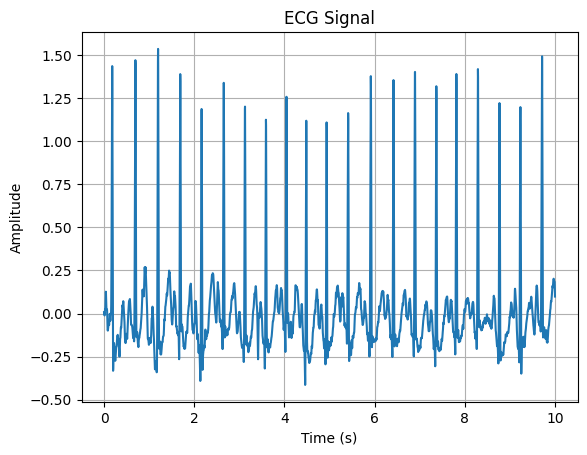

In [69]:
import matplotlib.pyplot as plt

fs = 360  # sampling frequency of the ECG= 360Hz
signal_length = 10  # ECG signal length= 10 seconds
num_samples = fs * signal_length
t = np.linspace(0, signal_length, num_samples)

#heart rate calculation
hr = calc_hr_bpm(r_peaks, fs)
print(hr)

#verify the result by plotting the ECG signal over time
plt.plot(t, ecg_filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.grid(True)
plt.show()
